In [1]:
#import required python modules
import sys
import os
import numpy as np
from scipy.constants import c,pi
import matplotlib.pyplot as plt
from Raw_Data_Processor import RawDataProcessor

In [2]:
#specify path to ADC data
data_path = os.path.join(os.getcwd(),"MATLAB Code/Sample_Data/adc_data.bin")

#initialize a raw data processor
raw_data_processor = RawDataProcessor()
raw_data_processor.set_config_params(
    chirps_per_frame = 128,
    rx_channels = 4,
    tx_channels = 1,
    samples_per_chirp = 256,
    adc_sample_rate_Hz = 10e6,
    chirp_slope_MHz_us=29.982000350952148,
    start_freq_Hz=77e9,
    idle_time_us = 100.0,
    ramp_end_time_us = 60.0
)

#load the raw data from the DCA1000
raw_data_processor.load_data_from_DCA1000(data_path)

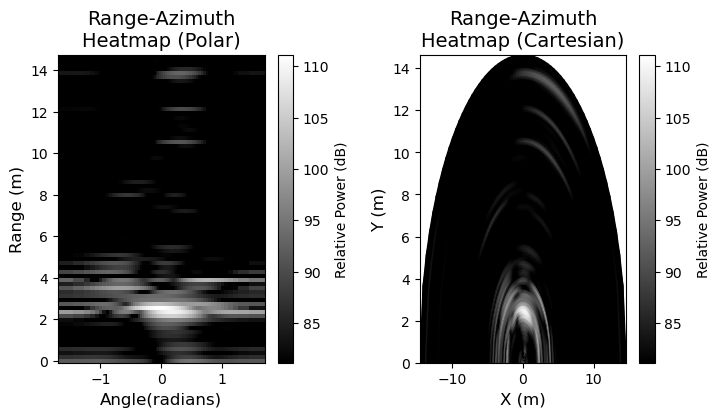

In [3]:
#plot the range-azimuth heatmap for a single chirp and frame
raw_data_processor.plot_range_azimuth_heatmap(frame=0,chirp=1,range_lims=[0,15])

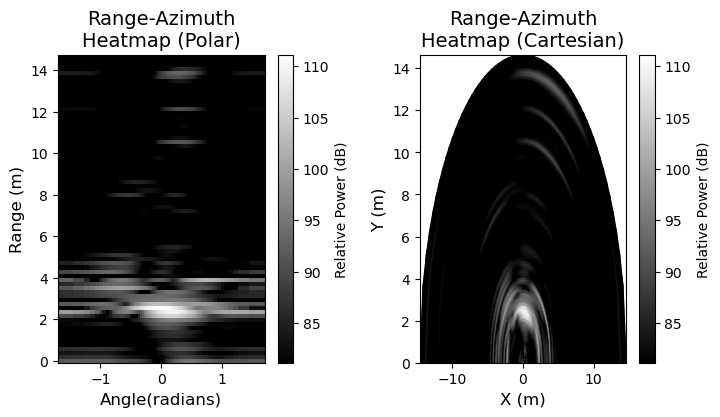

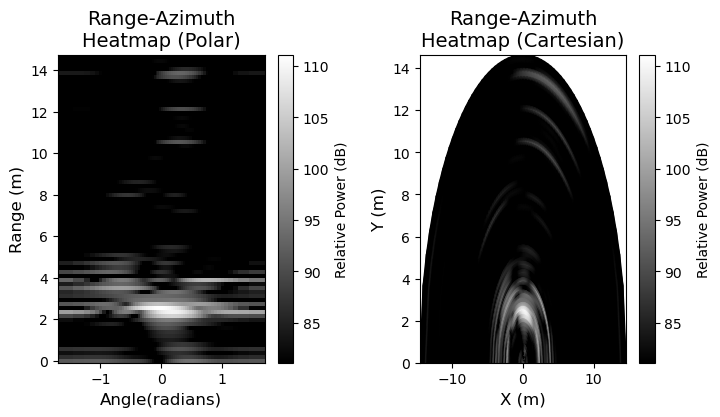

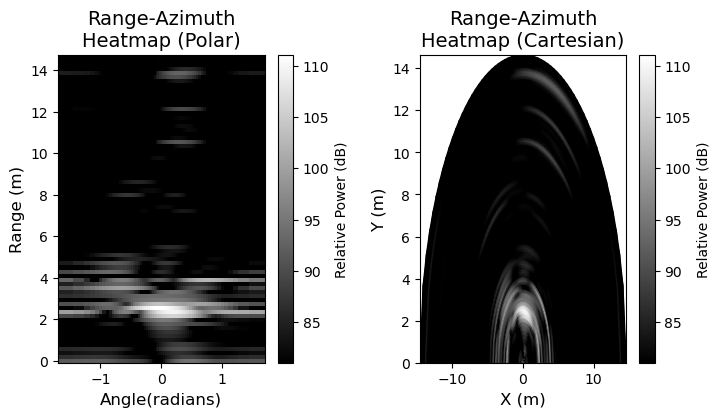

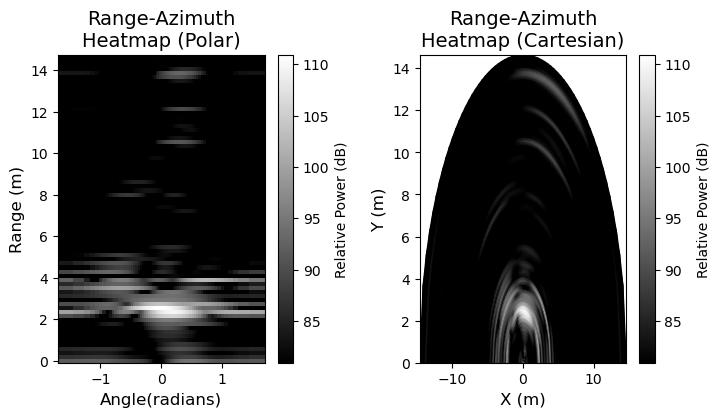

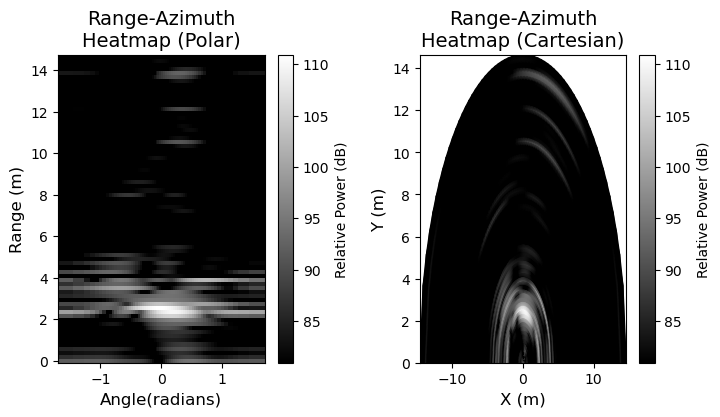

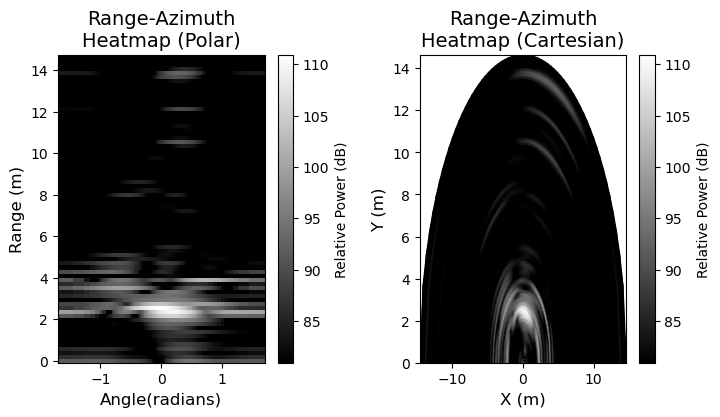

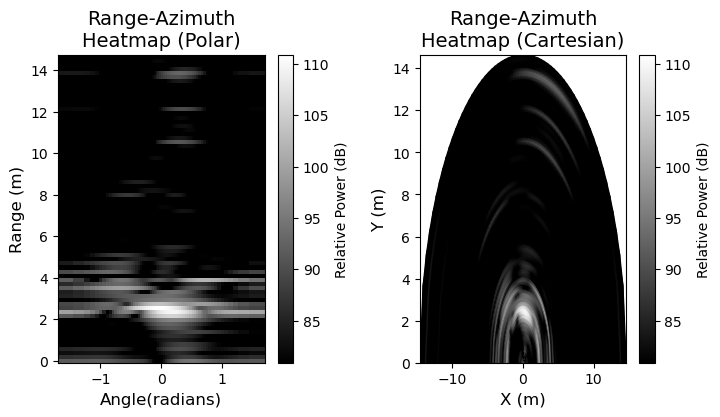

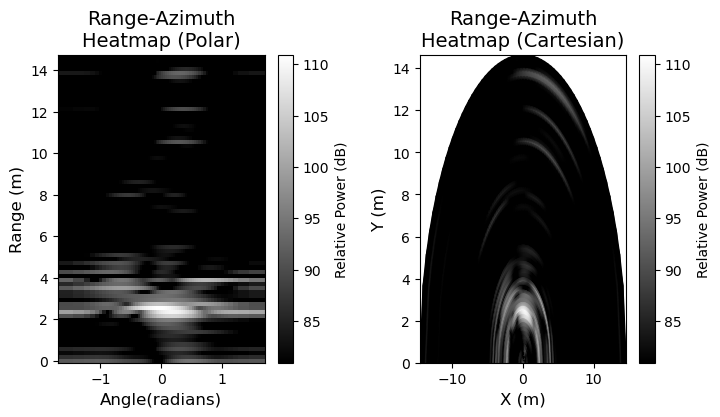

In [4]:
#generate a .gif of the raw data for improved visualization
raw_data_processor.generate_gif(frame_period_s=0.30,
                                enable_color_bar=True,
                                cutoff_val_dB=30,
                                range_lims=[0,15])